**Plastic Pollution** probably the most common problem of human is plastic pollution in this era.
the focus of this study is to understand
... total wastage by each country and mismanaged waste in the year 2010.

In [2]:
#import necessary liabrarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving per-capita-plastic-waste-vs-gdp-per-capita.csv to per-capita-plastic-waste-vs-gdp-per-capita.csv


In [4]:
df = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [5]:
df.columns
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [6]:
# removing entities/countries with incomplete/missing data
incomplete_data_index = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
df.drop(incomplete_data_index, inplace=True)

In [7]:
# new dataframe that takes in the required data (by year 2010)
data = df[df['Year'] == 2010]
data = data.drop(columns='Continent')

In [8]:
# retrieving continent names (from 2015 data)
con_names = df[df['Year'] == 2015]
data['Continent'] = con_names['Continent'].values

In [11]:
# dropping rows with missing Continent values using index
miss_index = data[data['Continent'].isna()].index
data.drop(miss_index, inplace=True)

In [12]:
# dropping rows with missing per person waste generation values
data = data[data['Waste per person(kg/day)'].notna()]

waste_gener = data.reset_index().drop('index', axis=1)

In [13]:
waste_gener.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


*....Following is a dataset containing mismanaged plastic waste per person in Kg/day...*

In [14]:
#load the data set
from google.colab import files
uploaded = files.upload()


Saving per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv to per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv


In [15]:
df2 = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [16]:
df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                     'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                     'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)
df2.drop('Continent', axis=1, inplace=True)

In [17]:
# new dataframe for the required data
data2 = df2[df2['Year'] == 2010]

In [18]:
# dropping rows with missing mismanaged waste values
data2 = data2[data2['Mismanaged waste per person(kg/day)'].isna() != True]

waste_misma = data2.reset_index().drop('index', axis=1)

In [19]:
# joining both the dataframes
plastic_waste = pd.merge(waste_gener, waste_misma, how='inner')

In [20]:
# rearranging columns in the dataframe
plastic_waste.columns.tolist()
col_list = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']
plastic_waste = plastic_waste[col_list]

# rounding the values per person
plastic_waste.iloc[:, 3:5] = np.around(plastic_waste[['Waste per person(kg/day)', 
                                                      'Mismanaged waste per person(kg/day)']], decimals=2)

# changing datatype
plastic_waste['Total Population'] = plastic_waste['Total Population'].astype(int)

**Generating Total waste** and Total mismanaged waste by country
Total waste is achieved by using the product of waste generated per person per day and the total population of that country.

*Total mismanaged waste* is achieved by using the product of mismanaged waste per person a day and the total population of that country.
</ul>
Both are then multiplied by 365 to get the value for a year.

In [21]:
plastic_waste['Total waste(kgs/year)'] = ((plastic_waste['Waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)
plastic_waste['Total waste mismanaged(kgs/year)'] = ((plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)


In [22]:
plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


AttributeError: ignored

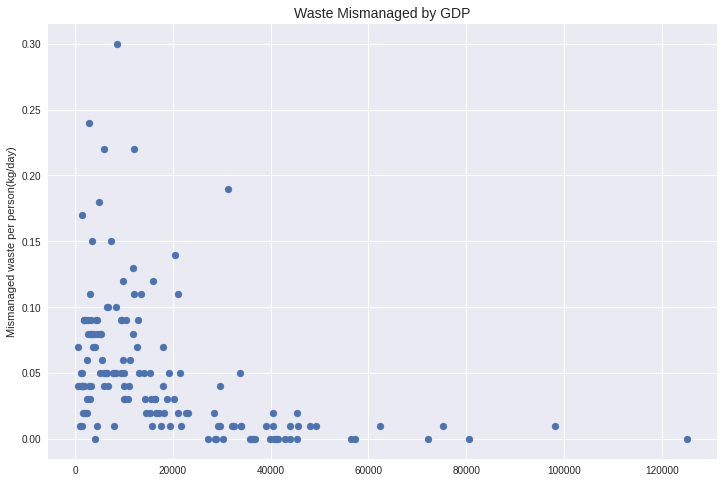

In [23]:
%matplotlib inline

plt.style.use('seaborn')
plt.figure(1, figsize=(12,8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged by GDP', loc='center', fontsize=14)
plt.ylabel('Mismanaged waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()

AttributeError: ignored

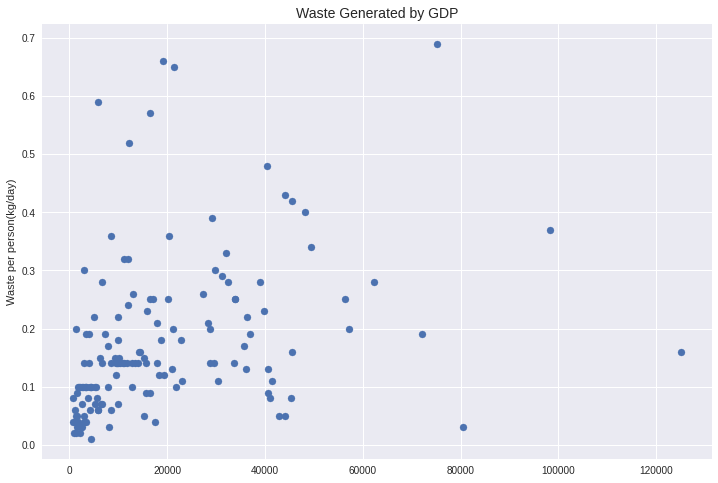

In [24]:
%matplotlib inline

plt.style.use('seaborn')
plt.figure(2, figsize=(12,8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=plastic_waste['GDP per capita in PPP'], y=plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()

By the above presented graphs it can be seen that:
Mismanaged waste does not increase with an increase in entity's GDP per capita. Hence, the evidence is enough to reject the claim.

Generated waste tend to increase with entity's GDP per capita. Hence, there is enough evidence to support the claim.